# <center> INTERNSHIP PROJECT </center>

## NAME                :          <FONT COLOR="ORANGE">AROCKIA ALEX XAVIER RAJ  J</FONT>
## DEPARTMENT  :          <FONT COLOR="ORANGE"> MSC DATA SCIENCE </FONT>
## COLLEGE         :          <FONT COLOR="ORANGE"> ST.JOSEPH'S COLLEGE,TRICHY.</FONT>

********************************************************************************************************************************

# TOPIC: HOUSE RENTAL PREDICTION ON METROPOLITAN CITIES IN INDIA

<img src="a.jpg" width="400">

## PROBLEM STATEMENT:
*	House and apartment rental prices are influenced by various factors. However, a good rent price predictions model analyses the different features of a home and its surroundings to generate the most suitable rent price.
	To understand the Key Features involved in the Rental Price of a house.
*	Key Features include-
        1.	Number of bedrooms
        2.	Number of bathrooms
        3.	Location
        4.	Area
        5.	Furnished Status

*	To Predict the Rental Price of a similar house from the existing data

*	Create an effective price prediction model

*	Validate the model’s prediction accuracy

*	Identify the important home price attributes which feed the model’s predictive power.


# Dataset Desciption:

1. SELLER TYPE: - AGENT, OWNER, BUILDER

2. NUMBER OF BEDROOMS:- Number of Bedrooms in a Particular property

3. LAYOUT TYPE:- BHK And RHK

4. PROPERTY TYPE:- Apartment, Independent House, Independent Floor, Villa,Penthouse

5. LOCALITY:- Location of the Property

6. AREA:- Area Size in Square Feet

7. FURNISH TYPE:- Furnished, Semi-Furnished, Unfurnished

8. NUMBER OF BATHROOMS:- Amount of Bathrooms in a Property

9. CITY: - Name of the Cities where the house located

9. PRICE:- Price of the Property (Target Variable)



### IMPORTING LIBRARIES 

In [189]:
# Importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [190]:
pwd

'C:\\Users\\Alex\\Downloads\\_All_Cities_Cleaned.csv'

<h3><font color = "green">LOADING THE DATASET</font>

In [191]:
# loading dataset into pandas dataframe
cr = pd.read_csv('_All_Cities_Cleaned.csv')
print("Dataset loaded successfully")

Dataset loaded successfully


### DATA PREPROCESSING

In [192]:
# check first 5 rows
cr.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [193]:
# check last 5 rows
cr.tail()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
193006,OWNER,1.0,BHK,Apartment,Chinchwad,13250.0,650.0,Semi-Furnished,1.0,Pune
193007,OWNER,1.0,RK,Studio Apartment,Wadgaon Sheri,7000.0,350.0,Unfurnished,1.0,Pune
193008,OWNER,1.0,BHK,Apartment,Kothrud,8500.0,389.0,Semi-Furnished,1.0,Pune
193009,AGENT,1.0,BHK,Apartment,Wakad,16500.0,670.0,Semi-Furnished,2.0,Pune
193010,AGENT,2.0,BHK,Apartment,Alandi,12000.0,800.0,Unfurnished,2.0,Pune


In [194]:
# getting the shape of data set
cr.shape

(193011, 10)

In [195]:
# getting the attributes
cr.columns

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city'],
      dtype='object')

In [196]:
# getting the data types
cr.dtypes

seller_type       object
bedroom          float64
layout_type       object
property_type     object
locality          object
price            float64
area             float64
furnish_type      object
bathroom         float64
city              object
dtype: object

In [197]:
# getting the information about the dataframe
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    193011 non-null  object 
 1   bedroom        193011 non-null  float64
 2   layout_type    193011 non-null  object 
 3   property_type  193011 non-null  object 
 4   locality       193011 non-null  object 
 5   price          193011 non-null  float64
 6   area           193011 non-null  float64
 7   furnish_type   193011 non-null  object 
 8   bathroom       193011 non-null  float64
 9   city           193011 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.7+ MB


In [198]:
# getting the statistical values for all numeric values
cr.describe()

,bedroom,price,area,bathroom
count,193011.000000,1.930110e+05,193011.000000,193011.000000
mean,2.081679,4.433654e+04,1264.604468,2.059883
std,0.956901,9.195199e+04,1043.725561,0.934805
min,1.000000,1.200000e+03,3.000000,1.000000
25%,1.000000,1.300000e+04,650.000000,1.000000
50%,2.000000,2.100000e+04,1000.000000,2.000000
75%,3.000000,3.600000e+04,1440.000000,3.000000
max,15.000000,5.885000e+06,19800.000000,19.000000


In [199]:
cr[cr['area']==3]

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
88876,AGENT,2.0,BHK,Independent House,Gopalnagar Society,21150.0,3.0,Semi-Furnished,2.0,Hyderabad


In [200]:
cr= cr.drop(index=88876)

In [201]:
cr.describe()

,bedroom,price,area,bathroom
count,193010.000000,1.930100e+05,193010.000000,193010.000000
mean,2.081680,4.433666e+04,1264.611005,2.059883
std,0.956903,9.195221e+04,1043.724314,0.934808
min,1.000000,1.200000e+03,100.000000,1.000000
25%,1.000000,1.300000e+04,650.000000,1.000000
50%,2.000000,2.100000e+04,1000.000000,2.000000
75%,3.000000,3.600000e+04,1440.000000,3.000000
max,15.000000,5.885000e+06,19800.000000,19.000000


<h3><font color = "blue">Checking Duplicate values</font>

In [202]:
# getting the duplicate values
duplicate=cr.duplicated()
print(duplicate.sum())
cr[duplicate]

85398


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
98,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
100,OWNER,2.0,BHK,Apartment,Shahibuag,13000.0,1126.0,Semi-Furnished,2.0,Ahmedabad
126,AGENT,4.0,BHK,Apartment,Jodhpur,55000.0,1800.0,Furnished,3.0,Ahmedabad
127,AGENT,4.0,BHK,Apartment,Jodhpur,55000.0,1800.0,Furnished,3.0,Ahmedabad
128,AGENT,4.0,BHK,Apartment,Jodhpur,55000.0,1800.0,Furnished,3.0,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
192983,OWNER,2.0,BHK,Apartment,Wanowrie,30000.0,1200.0,Furnished,2.0,Pune
192984,OWNER,2.0,BHK,Apartment,Wakad,19000.0,1004.0,Semi-Furnished,2.0,Pune
192985,OWNER,1.0,BHK,Independent Floor,Katraj,10000.0,516.0,Unfurnished,1.0,Pune
192986,OWNER,2.0,BHK,Apartment,Baner,20000.0,1178.0,Semi-Furnished,2.0,Pune


<h3><font color = "red">Removing Duplicate Values</font>

In [203]:
# removing duplicated values
cr.drop_duplicates(inplace=True)

In [204]:
# checking the shape of dataframe
cr.shape

(107612, 10)

In [205]:
# now checking the duplicate values
cr.duplicated().sum()

0

<h3><font color = "blue">Handling Outliers</font>


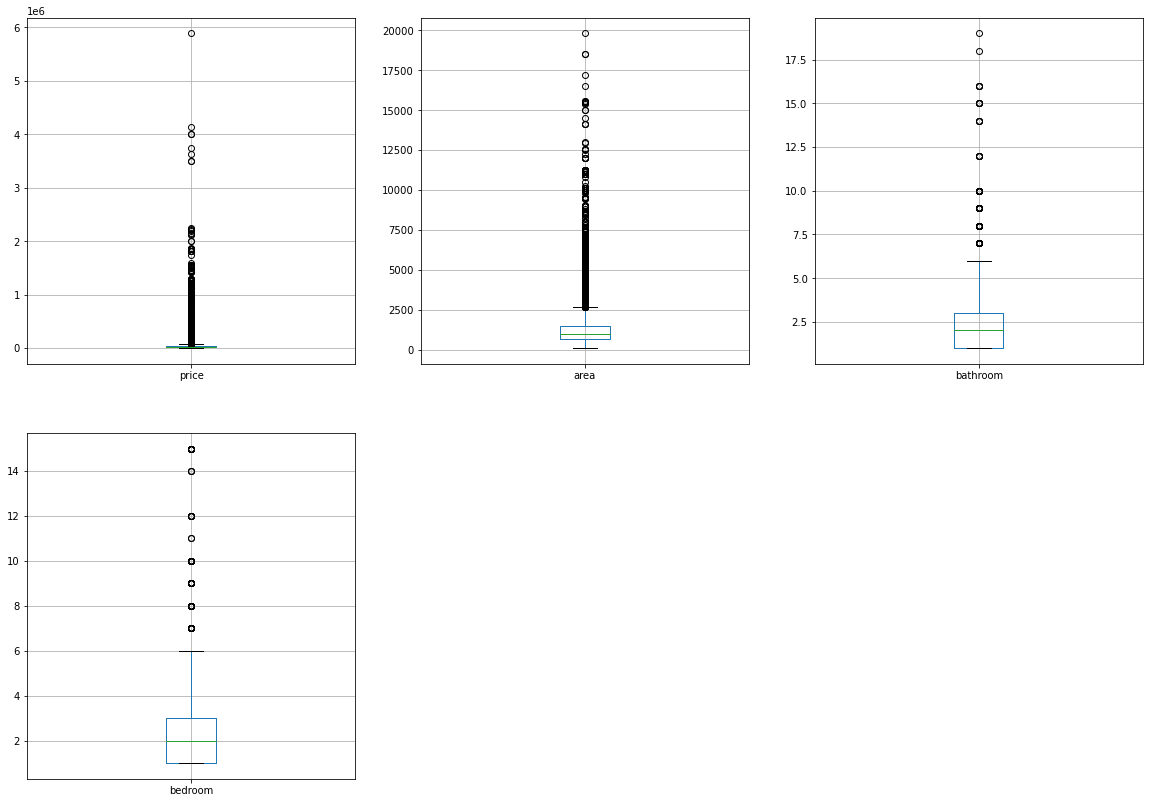

In [206]:
fig = plt.figure(figsize=(20,14))
plt.subplot(231)
cr.boxplot(column=["price"])


plt.subplot(2,3,2)
cr.boxplot(column=["area"])


plt.subplot(233)
cr.boxplot(column=["bathroom"])


plt.subplot(2,3,4)
cr.boxplot(column=["bedroom"])
plt.show()

<h3><font color = "red">Removing Outliers</font>

In [207]:
#removing outliers(price)
def RemoveOutlier(col):
    sorted(col)
    q1, q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    lower_range = q1-(1.5*IQR)
    upper_range = q3+(1.5*IQR)
    return lower_range, upper_range

lowprice, highprice = RemoveOutlier(cr['price'])
cr['price'] = np.where(cr['price']>highprice, highprice, cr['price'])
cr['price'] = np.where(cr['price']<lowprice, lowprice, cr['price'])


# removing outliers(area)
def RemoveOutlier(col):
    sorted(col)
    q1, q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    lower_range = q1-(1.5*IQR)
    upper_range = q3+(1.5*IQR)
    return lower_range, upper_range

lowarea, higharea = RemoveOutlier(cr['area'])
cr['area'] = np.where(cr['area']>higharea, higharea, cr['area'])
cr['area'] = np.where(cr['area']<lowarea, lowarea, cr['area'])
# removing outliers(bathroom)

def RemoveOutlier(col):
    sorted(col)
    q1, q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    lower_range = q1-(1.5*IQR)
    upper_range = q3+(1.5*IQR)
    return lower_range, upper_range

lowcount, highcount = RemoveOutlier(cr['bathroom'])
cr['bathroom'] = np.where(cr['bathroom']>highcount, highcount ,cr['bathroom'])
cr['bathroom'] = np.where(cr['bathroom']<lowcount, lowcount, cr['bathroom'])

# removing outliers(bedroom)
def RemoveOutlier(col):
    sorted(col)
    q1, q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    lower_range = q1-(1.5*IQR)
    upper_range = q3+(1.5*IQR)
    return lower_range, upper_range

lowcount, highcount = RemoveOutlier(cr['bedroom'])
cr['bedroom'] = np.where(cr['bedroom']>highcount, highcount ,cr['bedroom'])
cr['bedroom'] = np.where(cr['bedroom']<lowcount, lowcount, cr['bedroom'])


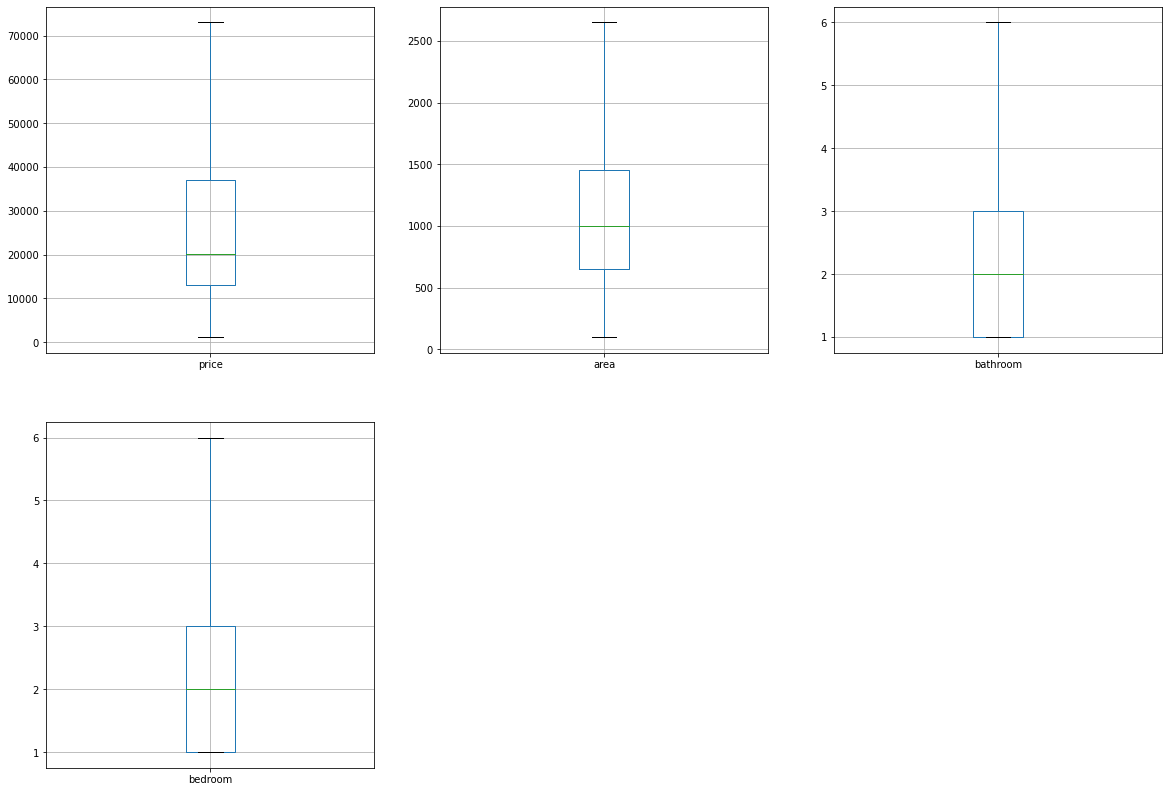

In [208]:
fig = plt.figure(figsize=(20,14))
plt.subplot(231)
cr.boxplot(column=["price"])


plt.subplot(2,3,2)
cr.boxplot(column=["area"])


plt.subplot(233)
cr.boxplot(column=["bathroom"])


plt.subplot(2,3,4)
cr.boxplot(column=["bedroom"])
plt.show()

<b><font color="red">Note</font></b> : This dataset has no null values and duplicate values now. So further processing will not be done such as replacing or deleting a null rows. So data is ready for traning, before training we visualise the data.

### EXPLORATORY DATA ANALYSIS

<h3><font color = "orange">Count Plots</font>

Show the counts of observations in each categorical bin using bars.

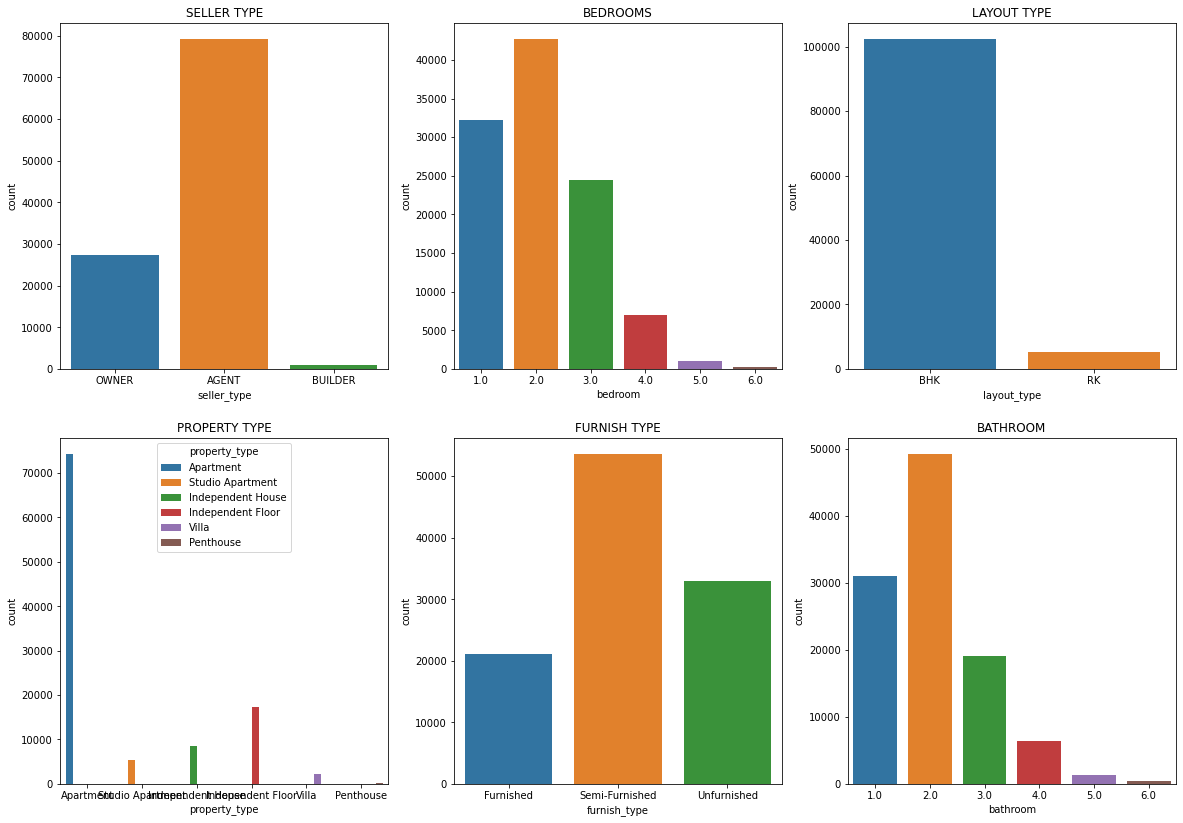

In [209]:
fig = plt.figure(figsize=(20,14))

#  subplot #1
plt.subplot(231)
plt.title('SELLER TYPE')
sns.countplot(data = cr, x='seller_type')

#  subplot #2
plt.subplot(2,3,2)
plt.title('BEDROOMS')
sns.countplot(data = cr, x='bedroom')

#  subplot #3
plt.subplot(233)
plt.title('LAYOUT TYPE')
sns.countplot(data = cr, x='layout_type')

#  subplot #4
plt.subplot(2,3,4)
plt.title('PROPERTY TYPE')
plt.legend(cr['property_type'].values)
sns.countplot(data = cr, x='property_type',hue ='property_type')

# subplot #5
plt.subplot(235)
plt.title('FURNISH TYPE')
sns.countplot(data = cr, x='furnish_type')

# subplot #6
plt.subplot(2,3,6)
plt.title('BATHROOM')
sns.countplot(data = cr, x='bathroom')


plt.show()

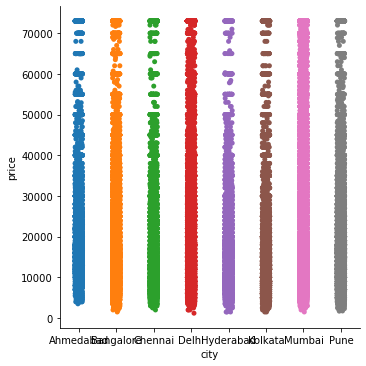

In [210]:
sns.catplot(x='city',y='price',data=cr)
plt.show()

In [211]:
# sns.catplot(x='price',y='area',data=cr)
# plt.show()

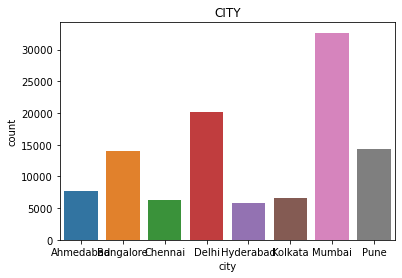

In [212]:
plt.title('CITY')
sns.countplot(data = cr, x='city')
plt.show()

From the above plots we can see that
1. Most of the houses are sold by agents
2. Many houses having the count of 2 bathrooms and 2 bedrooms
3. Many houses are BHK compared to RK
4. Independent floor property type has most count compared to other property types
5. Compared to other cities mumbai has more number of houses for rent

In [213]:
#getting statistical values for area
cr['area'].describe()

count    107612.000000
mean       1158.681792
std         632.698494
min         100.000000
25%         650.000000
50%        1000.000000
75%        1450.000000
max        2650.000000
Name: area, dtype: float64

In [214]:
#getting statistical values for price
cr['price'].describe()

count    107612.000000
mean      28316.928028
std       20914.773562
min        1200.000000
25%       13000.000000
50%       20100.000000
75%       37000.000000
max       73000.000000
Name: price, dtype: float64

In [215]:
#getting statistical values for bedroom
cr['bedroom'].describe()

count    107612.000000
mean          2.097731
std           0.951057
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: bedroom, dtype: float64

In [216]:
#getting statistical values for bathroom
cr['bathroom'].describe()

count    107612.000000
mean          2.065067
std           0.939829
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: bathroom, dtype: float64

<h3><font color = "orange">Histograms</font>

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

array([[<AxesSubplot:title={'center':'bedroom'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'bathroom'}>]], dtype=object)

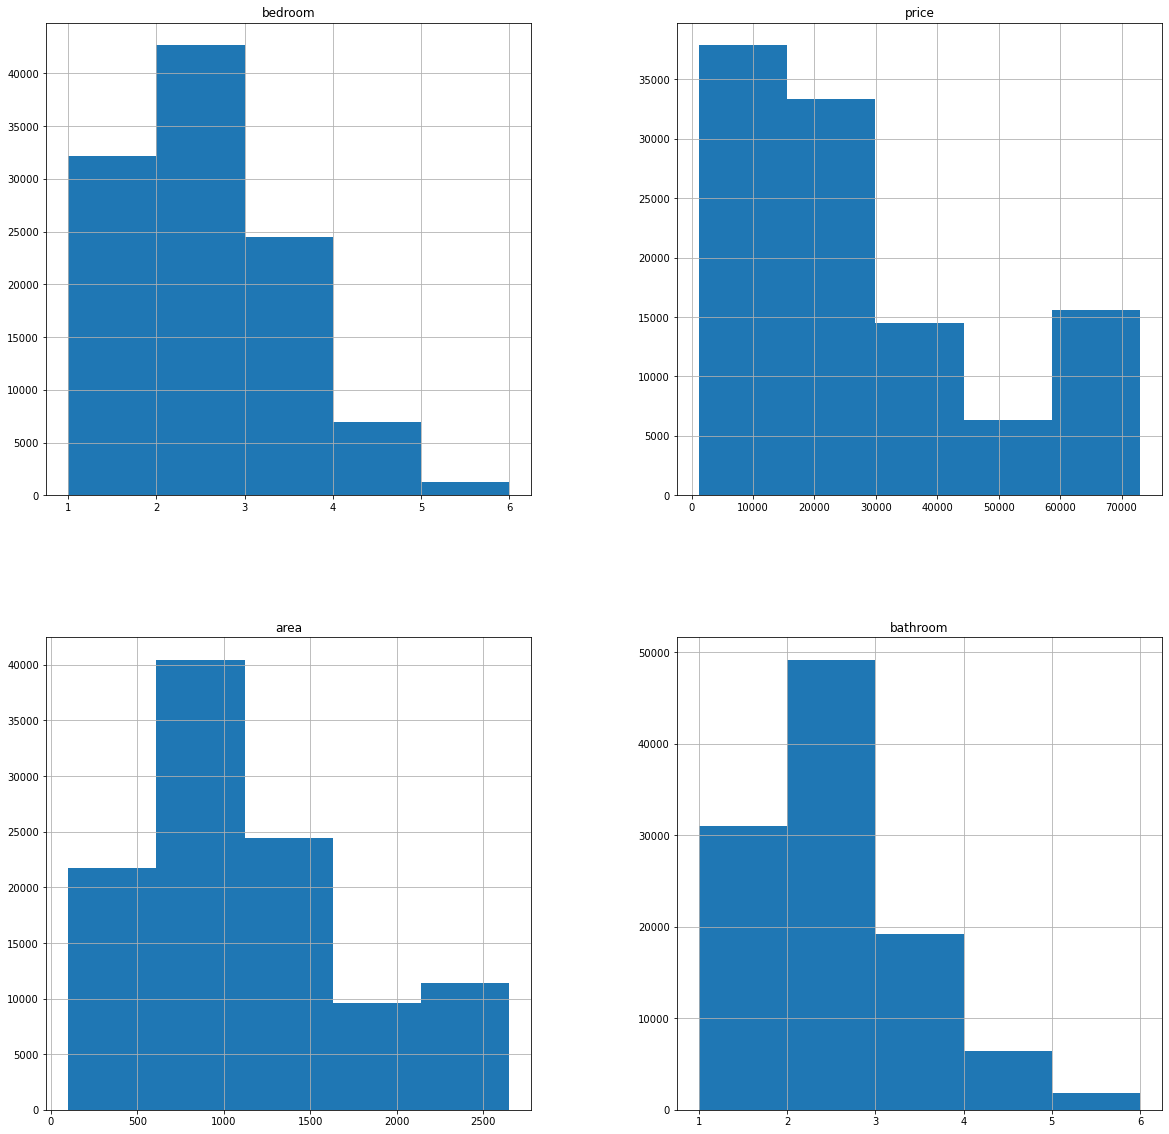

In [217]:
#Plotting histograms for all numerical attributes in a dataset
cr.hist(bins = 5,figsize=(20,20))


<h3><font color = "orange">Bar Plots</font>

 A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

<h5><font color="darkblue"> Seller Type vs other numerical attributes</font>

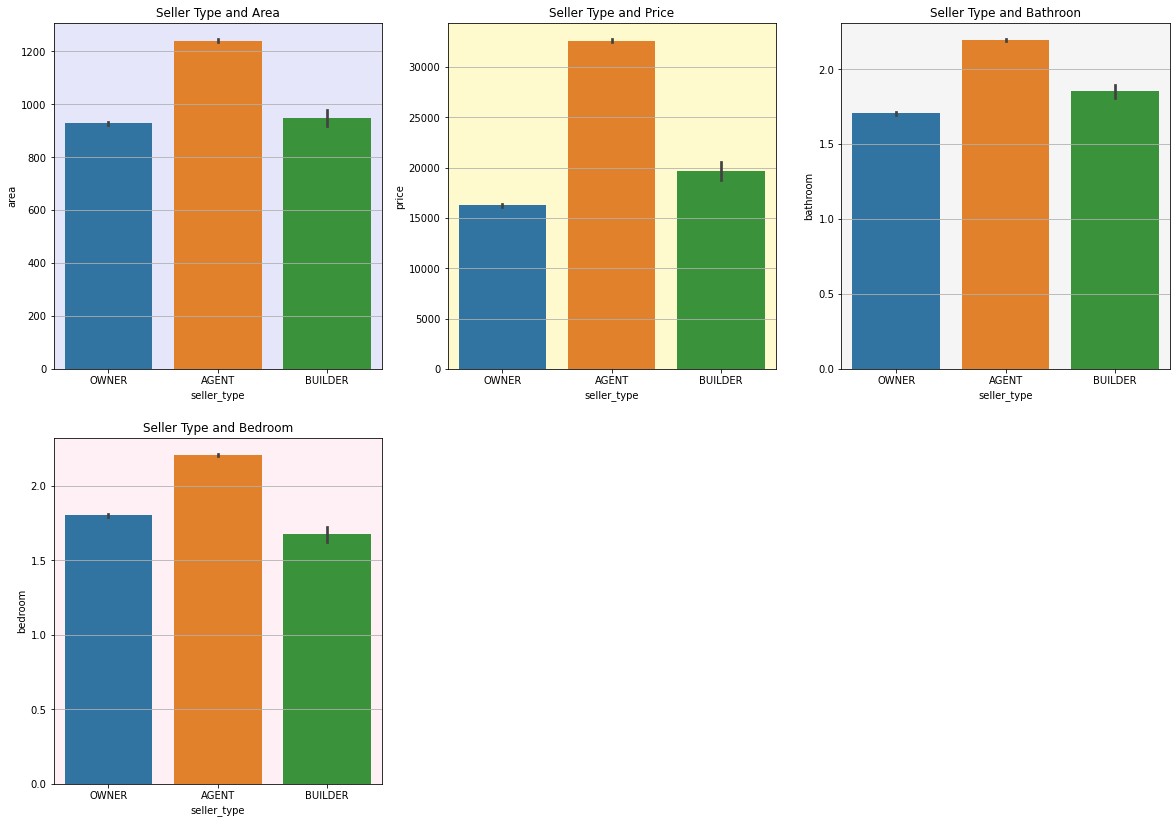

In [218]:
fig = plt.figure(figsize=(20,14))


plt.subplot(231)
plt.grid()
plt.title('Seller Type and Area')
sns.barplot(x="seller_type", y="area", data=cr).set_facecolor("Lavender")

plt.subplot(2,3,2)
plt.grid()
plt.title('Seller Type and Price')
sns.barplot(x="seller_type", y="price", data=cr).set_facecolor("LemonChiffon")

plt.subplot(233)
plt.grid()
plt.title('Seller Type and Bathroon')
sns.barplot(x="seller_type", y="bathroom", data=cr).set_facecolor("whitesmoke")

plt.subplot(2,3,4)
plt.grid()
plt.title('Seller Type and Bedroom')
sns.barplot(x="seller_type", y="bedroom", data=cr).set_facecolor("LavenderBlush")

* From the above bar graphs, the seller type 'agent' has maximum amount of area,price,bathrooms and bedrooms more when compared to owners and buliders

<h5><font color="darkblue">Layout Type vs other numerical attributes</font>

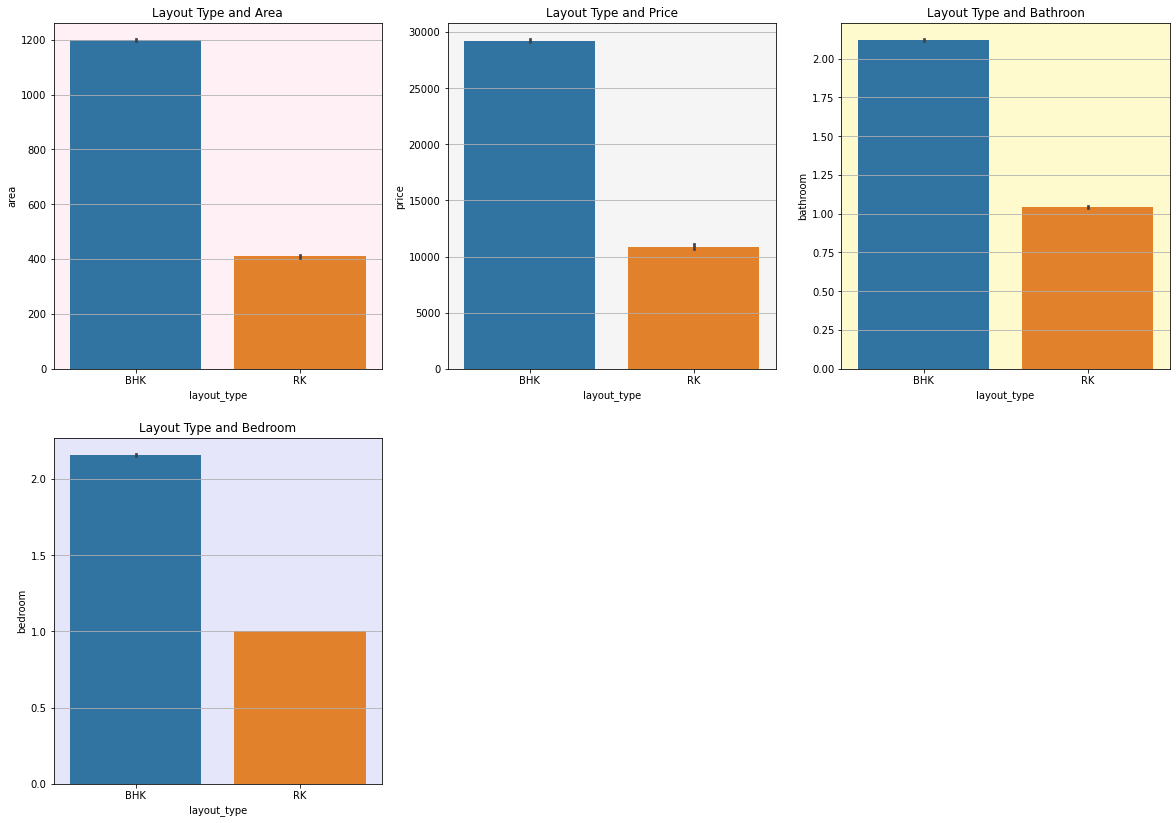

In [219]:
fig = plt.figure(figsize=(20,14))


plt.subplot(231)
plt.grid()
plt.title('Layout Type and Area')
sns.barplot(x="layout_type", y="area", data=cr).set_facecolor("LavenderBlush")

plt.subplot(2,3,2)
plt.grid()
plt.title('Layout Type and Price')
sns.barplot(x="layout_type", y="price", data=cr).set_facecolor("whitesmoke")

plt.subplot(233)
plt.grid()
plt.title('Layout Type and Bathroon')
sns.barplot(x="layout_type", y="bathroom", data=cr).set_facecolor("LemonChiffon")

plt.subplot(2,3,4)
plt.grid()
plt.title('Layout Type and Bedroom')
sns.barplot(x="layout_type", y="bedroom", data=cr).set_facecolor("Lavender")

* From the above Bar graphs,BHK has maximum amount of area, price, bedrooms and bathrooms compared to RK

<h5><font color="darkblue">Property Type vs other numerical attributes</font>

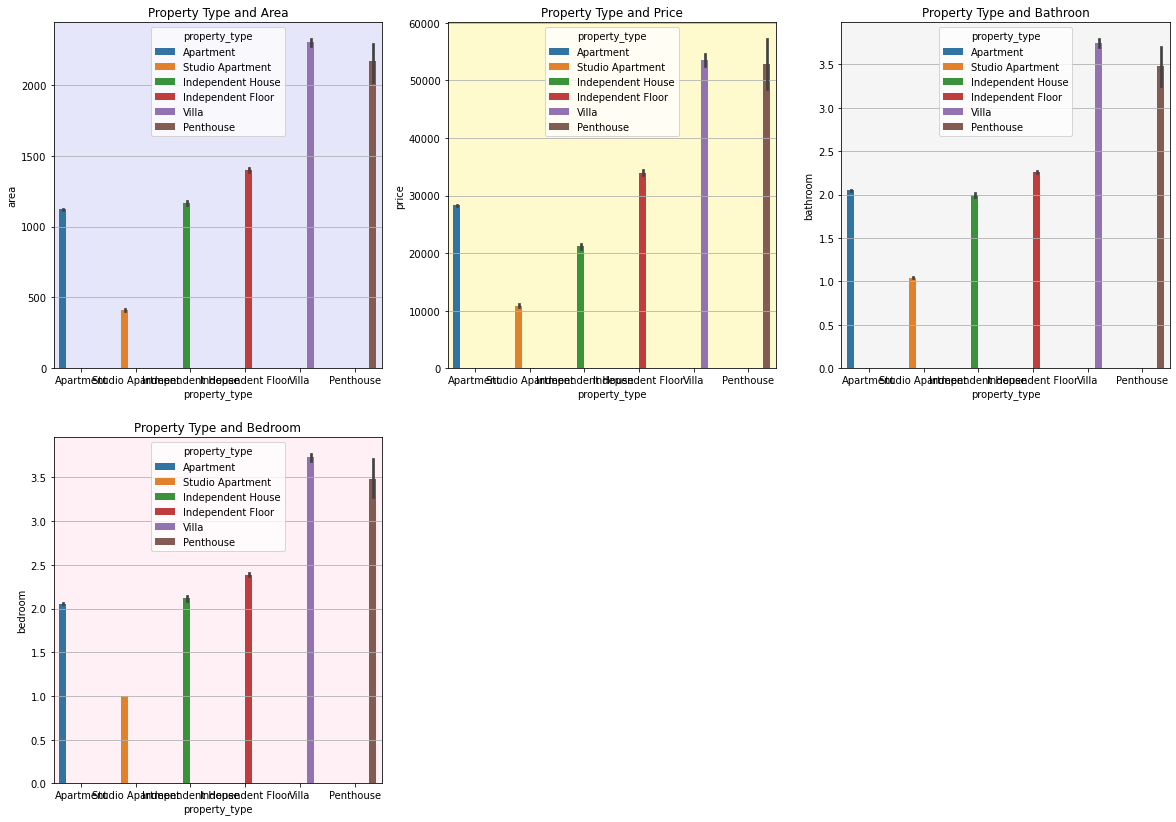

In [220]:
fig = plt.figure(figsize=(20,14))


plt.subplot(231)
plt.grid()
plt.title('Property Type and Area')
sns.barplot(x="property_type", y="area", data=cr,hue = "property_type").set_facecolor("Lavender")

plt.subplot(2,3,2)
plt.grid()
plt.title('Property Type and Price')
sns.barplot(x="property_type", y="price", data=cr,hue = "property_type").set_facecolor("LemonChiffon")

plt.subplot(233)
plt.grid()
plt.title('Property Type and Bathroon')
sns.barplot(x="property_type", y="bathroom", data=cr,hue = "property_type").set_facecolor("whitesmoke")

plt.subplot(2,3,4)
plt.grid()
plt.title('Property Type and Bedroom')
sns.barplot(x="property_type", y="bedroom", data=cr,hue = "property_type").set_facecolor("LavenderBlush")

From the above bar graphs we can say that Villas and Penthouses has more amount of price, area , bedrooms and bathrooms compared to other property types

<h5><font color="darkblue">Furnish Type vs other numerical attributes</font>

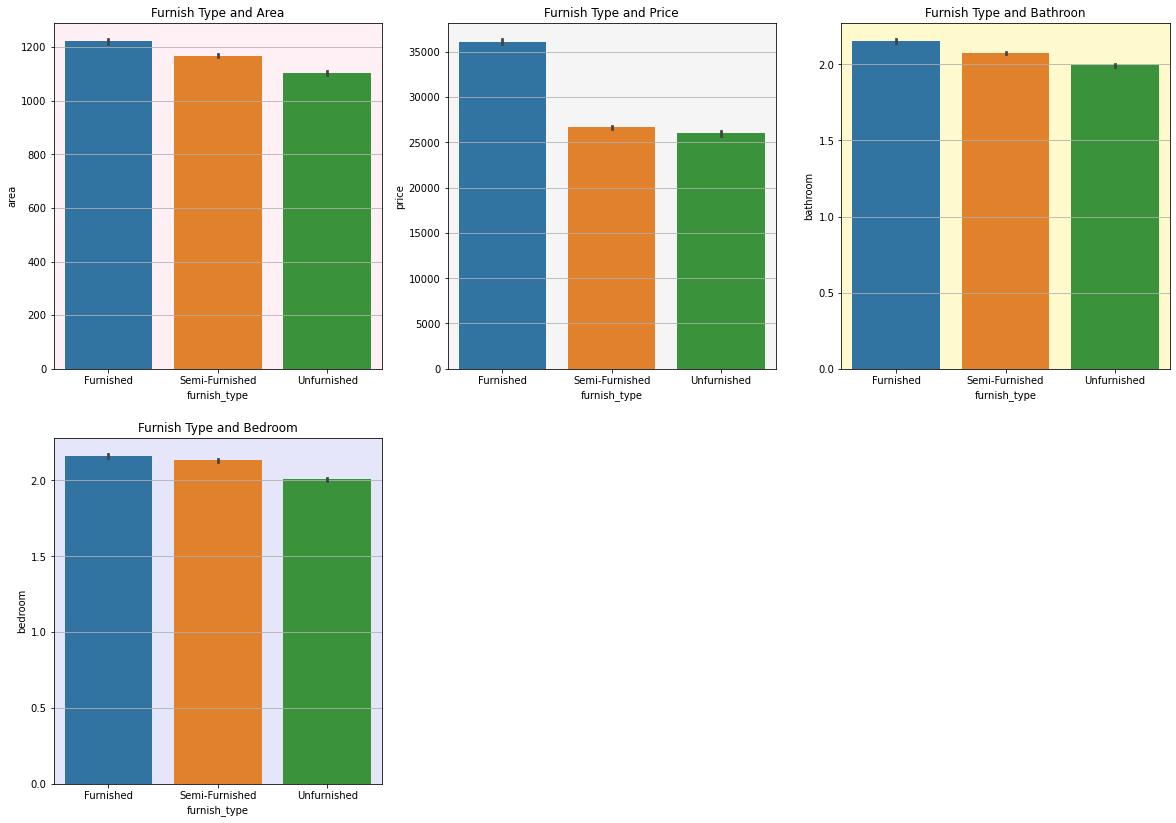

In [221]:
fig = plt.figure(figsize=(20,14))


plt.subplot(231)
plt.grid()
plt.title('Furnish Type and Area')
sns.barplot(x="furnish_type", y="area", data=cr).set_facecolor("LavenderBlush")

plt.subplot(2,3,2)
plt.grid()
plt.title('Furnish Type and Price')
sns.barplot(x="furnish_type", y="price", data=cr).set_facecolor("whitesmoke")

plt.subplot(233)
plt.grid()
plt.title('Furnish Type and Bathroon')
sns.barplot(x="furnish_type", y="bathroom", data=cr).set_facecolor("LemonChiffon")

plt.subplot(2,3,4)
plt.grid()
plt.title('Furnish Type and Bedroom')
sns.barplot(x="furnish_type", y="bedroom", data=cr).set_facecolor("Lavender")

* Furnished houses has more area,price,number of bathrooms and bedrooms compared to semi-furnished and unfurnished houses

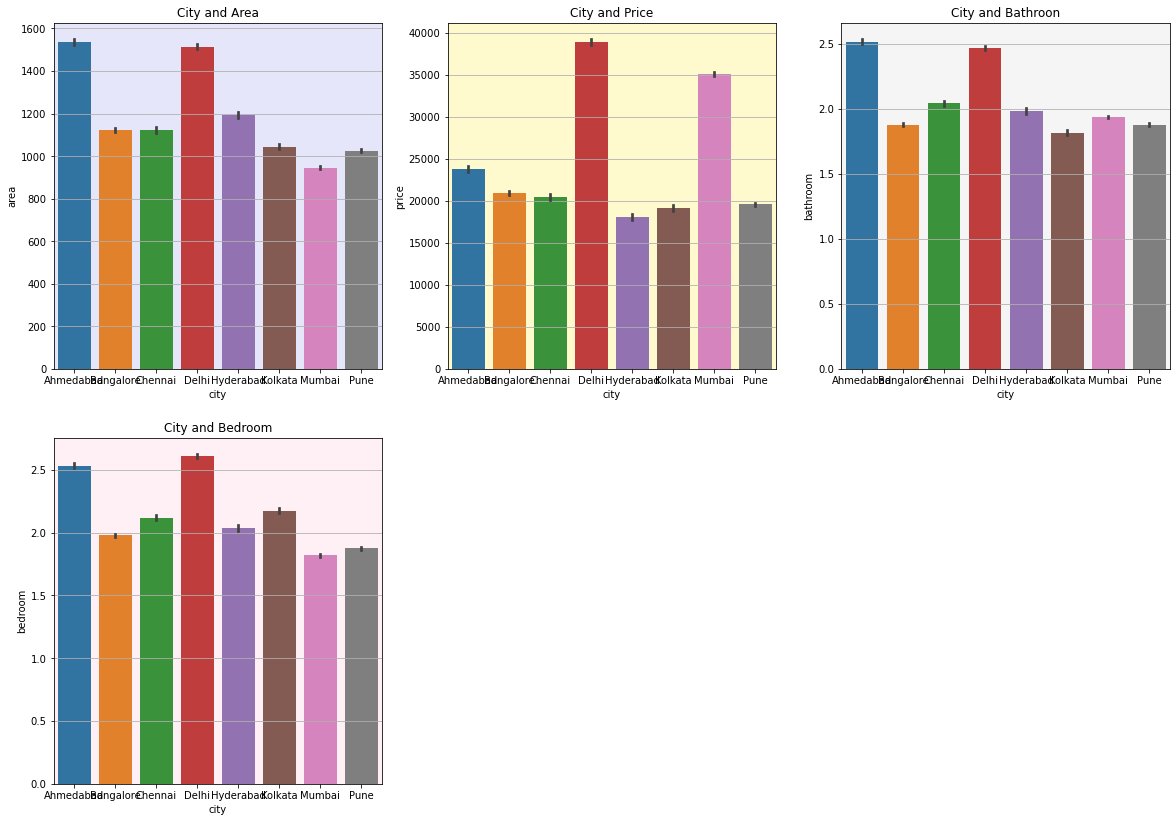

In [222]:
fig = plt.figure(figsize=(20,14))


plt.subplot(231)
plt.grid()
plt.title('City and Area')
sns.barplot(x="city", y="area", data=cr).set_facecolor("Lavender")

plt.subplot(2,3,2)
plt.grid()
plt.title('City and Price')
sns.barplot(x="city", y="price", data=cr).set_facecolor("LemonChiffon")

plt.subplot(233)
plt.grid()
plt.title('City and Bathroon')
sns.barplot(x="city", y="bathroom", data=cr).set_facecolor("whitesmoke")

plt.subplot(2,3,4)
plt.grid()
plt.title('City and Bedroom')
sns.barplot(x="city", y="bedroom", data=cr).set_facecolor("LavenderBlush")

* Houses sold in Ahmedabad has more area among other cities

* Maximum price for the houses are sold in Delhi


In [223]:
#statistical summary for attributes having numerical values
cr.describe()

,bedroom,price,area,bathroom
count,107612.000000,107612.000000,107612.000000,107612.000000
mean,2.097731,28316.928028,1158.681792,2.065067
std,0.951057,20914.773562,632.698494,0.939829
min,1.000000,1200.000000,100.000000,1.000000
25%,1.000000,13000.000000,650.000000,1.000000
50%,2.000000,20100.000000,1000.000000,2.000000
75%,3.000000,37000.000000,1450.000000,3.000000
max,6.000000,73000.000000,2650.000000,6.000000


In [224]:
#correlation
cor = cr.corr()
cor

,bedroom,price,area,bathroom
bedroom,1.000000,0.648070,0.861670,0.868044
price,0.648070,1.000000,0.699331,0.674038
area,0.861670,0.699331,1.000000,0.835074
bathroom,0.868044,0.674038,0.835074,1.000000


<AxesSubplot:>

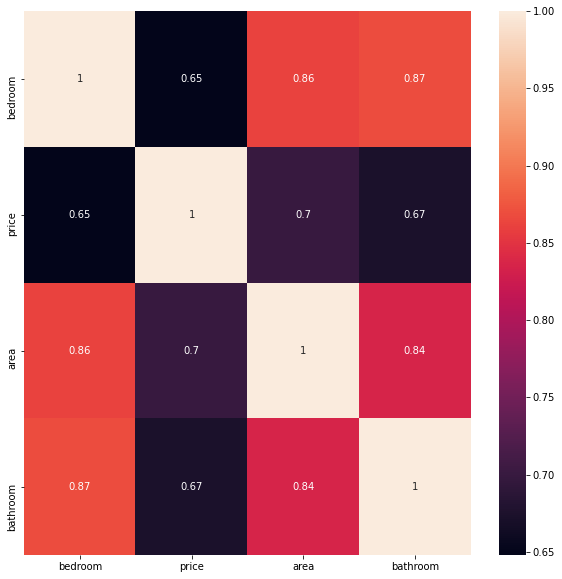

In [225]:
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, annot_kws={"size": 10})

From this heat map we can see that 
1. price and area,bathroom,bedroom are  positively correlated

In [226]:
#getting value counts of each category in locality attribute
cr['locality'].value_counts()

Thane West                  1925
Andheri East                1677
Chembur                     1312
Kharghar                    1214
Wagholi                     1211
                            ... 
Mahavir Enclave Part 2         1
Shraddhanand Road              1
Residency Road                 1
Bharthal                       1
Rajouri Garden Extension       1
Name: locality, Length: 4146, dtype: int64

In [227]:
cr = cr.drop('locality',axis=1)                     


<h3><font color = "orange">Label Encoding</font>

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning

In [228]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['seller_type', 'layout_type', 'property_type', 'furnish_type','city']:
    cr[i] = le.fit_transform(cr[i])
cr.head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,city
0,2,2.0,0,0,20000.0,1450.0,0,2.0,0
1,2,1.0,1,4,7350.0,210.0,1,1.0,0
2,2,3.0,0,0,22000.0,1900.0,2,3.0,0
3,2,2.0,0,2,13000.0,1285.0,1,2.0,0
4,2,2.0,0,2,18000.0,1600.0,0,2.0,0


In [229]:
#number of rows and columns in a dataframe
cr.shape

(107612, 9)


<h3><font color = "brown">Splitting the Dataframe into Features and Target Variable</font>

In [230]:
#dropping the dependent variable from a features dataframe
x = cr.drop(['price'],axis=1)

In [231]:
#columns of  features dataframe
x.columns

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'area',
       'furnish_type', 'bathroom', 'city'],
      dtype='object')

In [232]:
#getting top 5 rows of features dataframe
x.head()

,seller_type,bedroom,layout_type,property_type,area,furnish_type,bathroom,city
0,2,2.0,0,0,1450.0,0,2.0,0
1,2,1.0,1,4,210.0,1,1.0,0
2,2,3.0,0,0,1900.0,2,3.0,0
3,2,2.0,0,2,1285.0,1,2.0,0
4,2,2.0,0,2,1600.0,0,2.0,0


In [233]:
#target variable
y=cr['price']

In [234]:
y.head()

0    20000.0
1     7350.0
2    22000.0
3    13000.0
4    18000.0
Name: price, dtype: float64


<h3><font color = "brown">Splitting the Dataset into training and testing set</font>

In [235]:
from sklearn.model_selection import train_test_split

I took 80% of data for training and 20% of data for testing

In [236]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)

In [237]:
x_train.head()

,seller_type,bedroom,layout_type,property_type,area,furnish_type,bathroom,city
78140,0,4.0,0,1,2650.0,2,4.0,3
71963,0,3.0,0,1,2650.0,2,3.0,3
156312,0,3.0,0,0,1750.0,1,3.0,6
41248,2,1.0,0,1,1100.0,1,1.0,1
67429,0,3.0,0,1,2650.0,2,3.0,3


In [238]:
x_train.shape

(86089, 8)

In [239]:
x_test.shape

(21523, 8)

In [240]:
x_test.head()

,seller_type,bedroom,layout_type,property_type,area,furnish_type,bathroom,city
156588,2,1.0,0,2,600.0,0,1.0,6
140953,0,1.0,0,0,400.0,2,1.0,6
93149,2,2.0,0,1,1000.0,2,1.0,4
25621,0,2.0,0,0,1150.0,1,1.0,1
155450,0,4.0,0,0,2400.0,1,4.0,6


### LINEAR REGRESSION(Model 1)


In [241]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)
training_score = round(model1.score(x_train,y_train)*100,3)
print("The training score is",training_score)
testing_score = round(model1.score(x_test,y_test)*100,3)
print("The testing score is",testing_score)
y_pred = model1.predict(x_test)
y_pred

The training score is 60.501
The testing score is 60.41


array([16766.52923651, 11975.48599217, 12112.83123446, ...,
       16212.71166274, -2822.22391436,  1192.00444243])

In [242]:
#accuracy score of model 1
score1 = r2_score(y_test,y_pred)
score1

0.6040984501359092

In [243]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'variance':y_test-y_pred})
df.head()

,Actual,Predicted,variance
156588,35000.0,16766.529237,18233.470763
140953,25000.0,11975.485992,13024.514008
93149,17000.0,12112.831234,4887.168766
25621,19000.0,18672.482898,327.517102
155450,73000.0,65773.109287,7226.890713


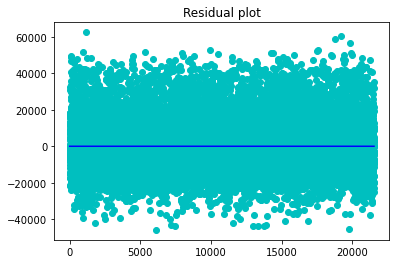

In [244]:
#residuals
residue = (y_test,y_pred)

#residual plot
x=[i for i in range(1,len(y_pred)+1)]
x_plot = plt.scatter(x,(y_test-y_pred),c='c')
plt.plot(x,[0]*len(y_pred),c='b')
plt.title("Residual plot")
plt.show()

### RIDGE REGRESSION(Model 2)

In [245]:
from sklearn.linear_model import Ridge
#alpha range = [0.01,0.05,0.5,5]
model2 = Ridge(alpha = 0.01,normalize = True)
model2.fit(x_train,y_train)
training_score = round(model2.score(x_train,y_train)*100,3)
print("The training score is",training_score)
testing_score = round(model2.score(x_test,y_test)*100,3)
print("The testing score is",testing_score)
from sklearn.metrics import r2_score

pred1 = model2.predict(x_test)
pred1

The training score is 60.492
The testing score is 60.399


array([16625.80226645, 12067.53730279, 12196.37652713, ...,
       16317.89731461, -2541.84210617,  1302.64811594])

In [246]:
#accuracy score of model 2
score2 = r2_score(y_test,pred1)
score2

0.6039915827528851

In [247]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':pred1,'variance':y_test-pred1})
df1.head()

,Actual,Predicted,variance
156588,35000.0,16625.802266,18374.197734
140953,25000.0,12067.537303,12932.462697
93149,17000.0,12196.376527,4803.623473
25621,19000.0,18748.918270,251.081730
155450,73000.0,65556.246155,7443.753845


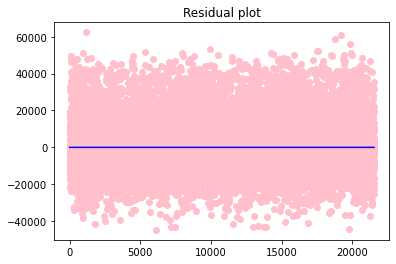

In [269]:
#residuals
residue = (y_test,pred1)

#residual plot
x=[i for i in range(1,len(pred1)+1)]
x_plot = plt.scatter(x,(y_test-pred1),c='pink')
plt.plot(x,[0]*len(pred1),c='b')
plt.title("Residual plot")
plt.show()

### LASSO REGRESSION(Model 3)

In [249]:
from sklearn.linear_model import Lasso
model3 = Lasso(alpha = 0.01,normalize = True)
model3.fit(x_train,y_train)
training_score = round(model3.score(x_train,y_train)*100,3)
print("The training score is",training_score)
testing_score = round(model3.score(x_test,y_test)*100,3)
print("The testing score is",testing_score)
lpred = model3.predict(x_test)
lpred

The training score is 60.501
The testing score is 60.41


array([16762.20533952, 11981.81080982, 12121.16451987, ...,
       16219.56905845, -2806.1669489 ,  1207.36907502])

In [250]:
#accuracy score of model 3
score3 = r2_score(y_test,lpred)
score3

0.6040994514019666

In [251]:
df = pd.DataFrame({'Actual':y_test,'Predicted':lpred,'variance':y_test-lpred})
df.head()

,Actual,Predicted,variance
156588,35000.0,16762.205340,18237.794660
140953,25000.0,11981.810810,13018.189190
93149,17000.0,12121.164520,4878.835480
25621,19000.0,18678.747364,321.252636
155450,73000.0,65761.249545,7238.750455


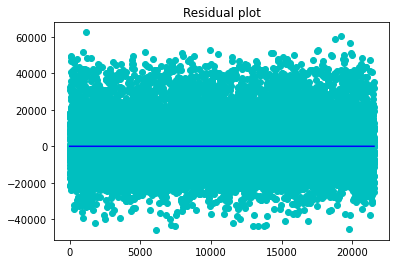

In [252]:
#residuals
residue = (y_test,y_pred)

#residual plot
x=[i for i in range(1,len(lpred)+1)]
x_plot = plt.scatter(x,(y_test-lpred),c='c')
plt.plot(x,[0]*len(lpred),c='b')
plt.title("Residual plot")
plt.show()

### XGB REGRESSOR(Model 4)

In [253]:
from xgboost.sklearn import XGBRegressor
model4 = XGBRegressor(subsample=1,colsample_bytree = 1,max_depth = 9)
model4.fit(x_train,y_train)
training_score = round(model4.score(x_train,y_train)*100,3)
print("The training score is",training_score)
testing_score = round(model4.score(x_test,y_test)*100,3)
print("The testing score is",testing_score)
y_pred = model4.predict(x_test)
y_pred

The training score is 81.813
The testing score is 77.564


array([17976.021 , 16023.81  ,  9848.126 , ..., 16206.98  ,  6532.5557,
       11098.11  ], dtype=float32)

In [254]:
#accuracy score of model 4
score4 = r2_score(y_test,y_pred)
score4

0.7756419614819616

In [255]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'variance':y_test-y_pred})
df2.head()

,Actual,Predicted,variance
156588,35000.0,17976.021484,17023.978516
140953,25000.0,16023.809570,8976.190430
93149,17000.0,9848.125977,7151.874023
25621,19000.0,19079.304688,-79.304688
155450,73000.0,70904.968750,2095.031250


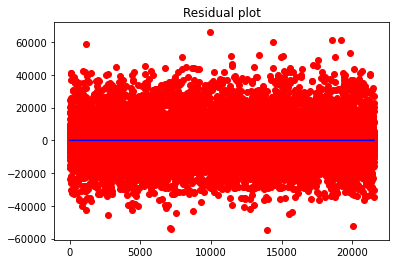

In [256]:
residue = (y_test,y_pred)

#residual plot
x=[i for i in range(1,len(y_pred)+1)]
x_plot = plt.scatter(x,(y_test-y_pred),c='red')
plt.plot(x,[0]*len(y_pred),c='b')
plt.title("Residual plot")
plt.show()

### DECISION TREE REGRESSOR(Model 5)

In [257]:
from sklearn.tree import DecisionTreeRegressor
model5 = DecisionTreeRegressor()
model5.fit(x_train,y_train)
training_score = round(model5.score(x_train,y_train)*100,3)
print("The training score is",training_score)
testing_score = round(model5.score(x_test,y_test)*100,3)
print("The testing score is",testing_score)
pred3 = model5.predict(x_test)
pred3


The training score is 84.898
The testing score is 72.521


array([35000.        , 17616.07142857, 15000.        , ...,
       14916.12903226,  8850.        , 10881.36363636])

In [258]:
#accuracy score of model 5
score5 = r2_score(y_test,pred3)
score5

0.7252146699980735

In [259]:
df = pd.DataFrame({'Actual':y_test,'Predicted':pred3,'variance':y_test-pred3})
df.head()

,Actual,Predicted,variance
156588,35000.0,35000.000000,0.000000
140953,25000.0,17616.071429,7383.928571
93149,17000.0,15000.000000,2000.000000
25621,19000.0,18000.000000,1000.000000
155450,73000.0,73000.000000,0.000000


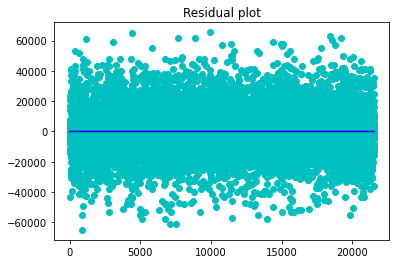

In [260]:
#residuals
residue = (y_test,pred3)

#residual plot
x=[i for i in range(1,len(pred3)+1)]
x_plot = plt.scatter(x,(y_test-pred3),c='c')
plt.plot(x,[0]*len(pred3),c='b')
plt.title("Residual plot")
plt.show()

### RANDOM FOREST REGRESSOR(Model 6)

In [261]:
from sklearn.ensemble import RandomForestRegressor
model6 = RandomForestRegressor(n_estimators = 30, random_state =123)
model6.fit(x_train, y_train) 
training_score = round(model6.score(x_train,y_train)*100,3)
print("The training score is",training_score)
testing_score = round(model6.score(x_test,y_test)*100,3)
print("The testing score is",testing_score)
pred6 = model6.predict(x_test)
pred6


The training score is 84.024
The testing score is 75.772


array([22211.08994709, 17819.42133699, 12929.49074074, ...,
       15005.73671498,  8289.05555556, 10968.59419142])

In [262]:
#accuracy score of model 6
score6 = r2_score(y_test,pred6)
score6

0.7577183789836964

In [263]:
df4 = pd.DataFrame({'Actual':y_test,'Predicted':pred6,'variance':y_test-pred6})
df4.head()

,Actual,Predicted,variance
156588,35000.0,22211.089947,12788.910053
140953,25000.0,17819.421337,7180.578663
93149,17000.0,12929.490741,4070.509259
25621,19000.0,18983.333333,16.666667
155450,73000.0,73000.000000,0.000000


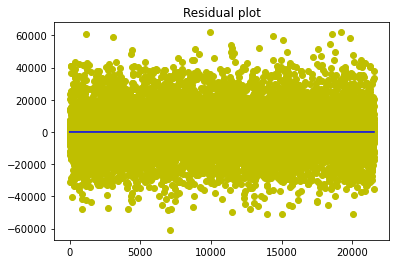

In [264]:
#residuals
residue = (y_test,y_pred)

#residual plot
x=[i for i in range(1,len(pred6)+1)]
x_plot = plt.scatter(x,(y_test-pred6),c='y')
plt.plot(x,[0]*len(pred6),c='b')
plt.title("Residual plot")
plt.show()

In [265]:
#creating a new dataframe to see the accuracy score of different models created above
df = pd.DataFrame({'Linear Regression':score1*100,'Ridge Regression':score2*100,'Lasso Regression':score3*100,'XGB Regression':score4*100,'Decision Tree Regression':score5*100,'Random Forest Regression':score6*100},index=['Model Accuracy Score:'])
df

,Linear Regression,Ridge Regression,Lasso Regression,XGB Regression,Decision Tree Regression,Random Forest Regression
Model Accuracy Score:,60.409845,60.399158,60.409945,77.564196,72.521467,75.771838


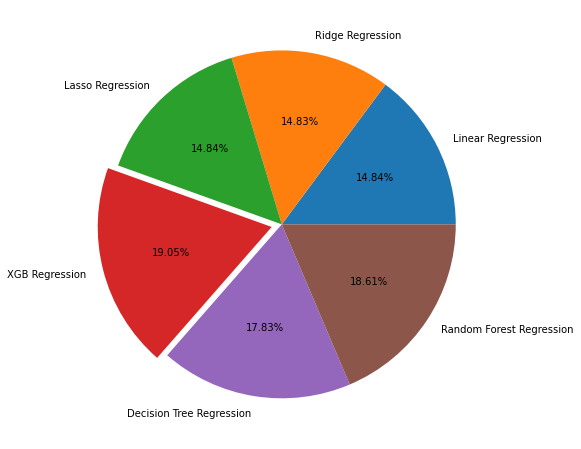

In [266]:
plt.figure(figsize=(15,8))
x_value = [60.40,60.39,60.40,77.56,72.59,75.77]
label = ['Linear Regression','Ridge Regression','Lasso Regression','XGB Regression','Decision Tree Regression','Random Forest Regression']
plt.pie(x_value,labels=label,explode = [0,0,0,0.060,0,0],autopct="%.2f%%")
plt.show()

* From the above 6 models created , i got good accuracy score in XGB Regressor model compared to other models


<h3><font color = "purple">Prediction by getting new inputs</font>

In [267]:
#XGB Regression
input_data1 =[[2,1.0,1,4,210.0,1,1.0,0]]
df = pd.DataFrame(input_data1,columns=x_test.columns)
df
a1 = model4.predict(df)
a1

array([7049.9727], dtype=float32)

In [268]:
input_data2 =[[2,2.0,0,2,1285.0,1,2.0,0]]
df = pd.DataFrame(input_data2,columns=x_test.columns)
df
a2 = model4.predict(df)
a2

array([12958.605], dtype=float32)

## CONCLUSION:

* From the dataset i have found that Mumbai city has more counts than other cities
* Compare to BHK and RK property types BHK has more price value than RK
* Villa and Penthouse Property types has more price and area compared to other property types
* For this problem I have used 6 models to predict the Rental price of the houses. In that XGB Regressor gives more accuracy     score than other models
* Finally I predicted the rental price by giving new inputs similar to the existing data